## DECISION TREE CLASSIFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
-

In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['target'].unique()

array([1, 0], dtype=int64)

In [8]:
df.shape

(303, 14)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
df[df['chol']>300].shape

(43, 14)

In [19]:
df[(df['chol']>300) & (df['age']<40)].shape

(1, 14)

In [18]:
overweight=df[(df['chol']>300) & (df['age']<40)]

In [20]:
overweight

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1


Text(0.5, 1.0, 'Age Distribution')

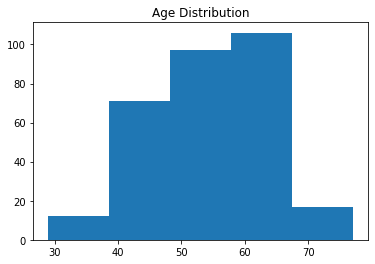

In [22]:
df['age'].hist(grid=False,bins=5)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age Distribution')

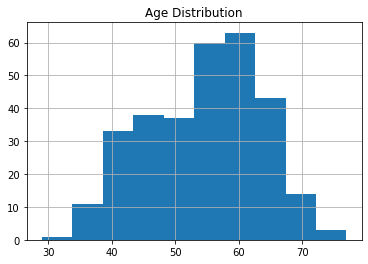

In [23]:
df['age'].hist(grid=True,bins=10)
plt.title('Age Distribution')

C:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

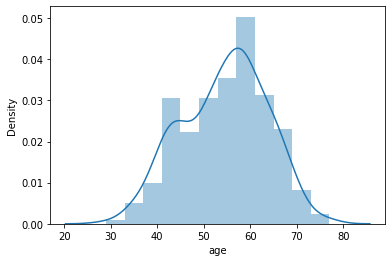

In [25]:
sns.distplot(df['age'])

<AxesSubplot: >

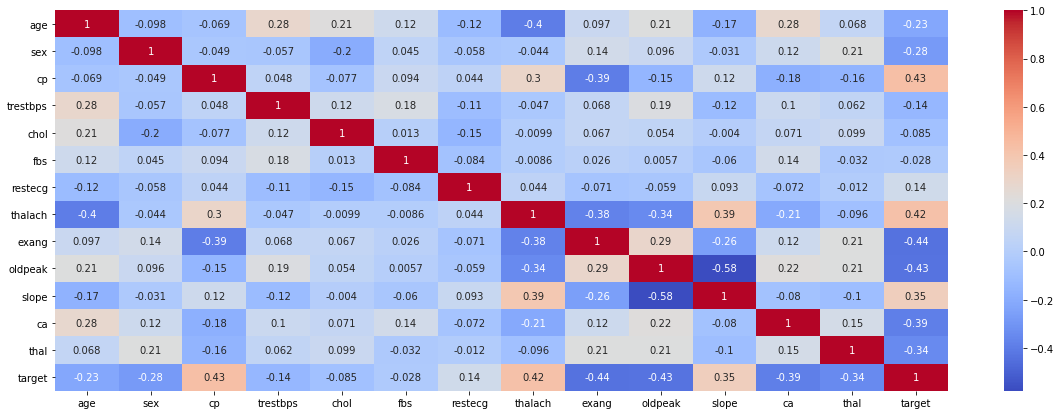

In [26]:
plt.rcParams['figure.figsize']=(20,7)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [28]:
x=df.iloc[:,:-1]
y=df['target']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=2)

In [32]:
print(x_train.shape)

(227, 13)


In [33]:
print(x_test.shape)

(76, 13)


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
cl=tree.DecisionTreeClassifier()
cl.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
pred=cl.predict(x_test)

In [37]:
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [38]:
accuracy_score(pred,y_test)

0.8552631578947368

In [39]:
confusion_matrix(pred,y_test)

array([[28,  3],
       [ 8, 37]], dtype=int64)

In [40]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.93      0.82      0.87        45

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76

